In [1]:
import pandas as pd
import numpy as np

In [2]:
rest = pd.read_csv("Dataset.csv")

In [3]:
rest.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
rest.shape

(9551, 21)

In [5]:
# Check for missing values
rest.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Fill missing values in the 'Cuisines' column with 'NaN'
rest.fillna({'Cuisines': 'NaN'}, inplace=True)
rest.shape

(9551, 21)

In [7]:
rest.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
rt = rest[['Restaurant ID','Restaurant Name','Cuisines','Aggregate rating','Votes']]

In [9]:
rt

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


In [10]:
# Check for Duplicates
rt.duplicated().sum()

0

In [11]:
rt['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [12]:
# Remove duplicate entries based on the 'Restaurant Name' column
unique_rt = rt.drop_duplicates(subset='Restaurant Name')

# Check the number of unique restaurants after removing duplicates
num_unique_restaurants = len(unique_rt)
print("Number of unique restaurants:", num_unique_restaurants)


Number of unique restaurants: 7446


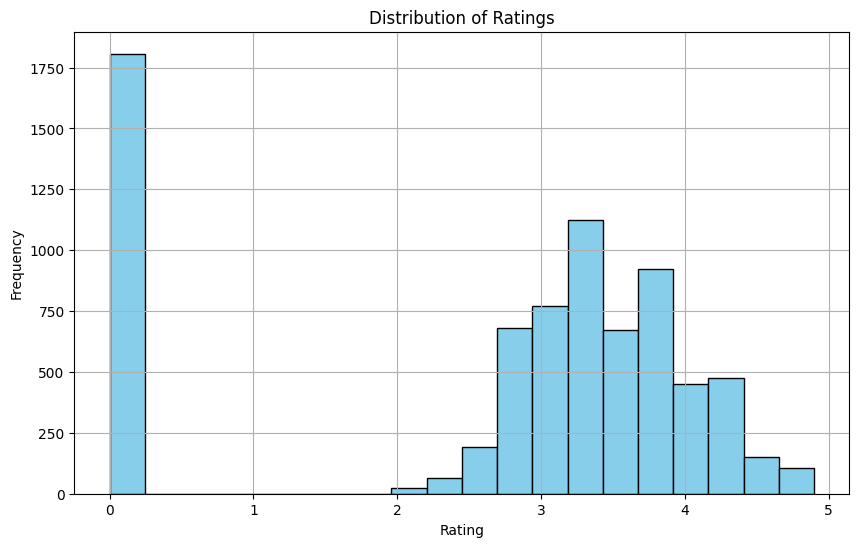

In [13]:
import matplotlib.pyplot as plt

# Plot histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(unique_rt['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
# Ensure that 'Cuisines' column is of string type
rt.loc[:, 'Cuisines'] = rt['Cuisines'].astype(str)

# Split 'Cuisines' column into a list
rt.loc[:, 'Cuisines'] = rt['Cuisines'].str.split(', ')

# Display the DataFrame
rt

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"[French, Japanese, Desserts]",4.8,314
1,6304287,Izakaya Kikufuji,[Japanese],4.5,591
2,6300002,Heat - Edsa Shangri-La,"[Seafood, Asian, Filipino, Indian]",4.4,270
3,6318506,Ooma,"[Japanese, Sushi]",4.9,365
4,6314302,Sambo Kojin,"[Japanese, Korean]",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,[Turkish],4.1,788
9547,5908749,Ceviz A��ac۱,"[World Cuisine, Patisserie, Cafe]",4.2,1034
9548,5915807,Huqqa,"[Italian, World Cuisine]",3.7,661
9549,5916112,A���k Kahve,[Restaurant Cafe],4.0,901


In [15]:
# Explode the 'Cuisines' column
rt = rt.explode('Cuisines')

# Display the DataFrame
rt

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,French,4.8,314
0,6317637,Le Petit Souffle,Japanese,4.8,314
0,6317637,Le Petit Souffle,Desserts,4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,Seafood,4.4,270
...,...,...,...,...,...
9547,5908749,Ceviz A��ac۱,Cafe,4.2,1034
9548,5915807,Huqqa,Italian,3.7,661
9548,5915807,Huqqa,World Cuisine,3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


In [16]:
# Cuisines Check
rt['Cuisines'].value_counts()

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 146, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the cuisines back into a single string per restaurant
rt['Cuisines'] = rt.groupby('Restaurant ID')['Cuisines'].transform(lambda x: ' '.join(x))

# Drop duplicates again after concatenation
rt = rt.drop_duplicates(subset=['Restaurant ID'])

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Apply TF-IDF to the 'Cuisines' column
tfidf_matrix = tfidf.fit_transform(rt['Cuisines'])


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping of restaurant ID to index
indices = pd.Series(rt.index, index=rt['Restaurant Name']).drop_duplicates()

In [19]:
def get_recommendations(user_cuisine, user_rating, cosine_sim=cosine_sim):
    # Filter the dataframe based on the user's rating preference
    if user_rating == 'cheap':
        rating_filter = (rt['Aggregate rating'] < 3)
    elif user_rating == 'moderate':
        rating_filter = (3 <= rt['Aggregate rating']) & (rt['Aggregate rating'] < 4)
    elif user_rating == 'shine':
        rating_filter = (rt['Aggregate rating'] >= 4)

    filtered_rt = rt[rating_filter]

    # Check if there are restaurants matching the criteria
    if filtered_rt.empty:
        return "No restaurants found matching your criteria."

    # Apply TF-IDF on the filtered dataframe
    tfidf_matrix_filtered = tfidf.transform(filtered_rt['Cuisines'])
    cosine_sim_filtered = cosine_similarity(tfidf_matrix_filtered, tfidf_matrix)

    # Calculate the similarity scores for the user's preferred cuisine
    idx = None
    for i in range(len(filtered_rt)):
        if user_cuisine.lower() in filtered_rt.iloc[i]['Cuisines'].lower():
            idx = i
            break

    if idx is None:
        return "No restaurants found matching your cuisine preference."

    sim_scores = list(enumerate(cosine_sim_filtered[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 recommendations
    restaurant_indices = [i[0] for i in sim_scores]

    # Ensure indices are within the bounds of filtered_rt
    valid_indices = [i for i in restaurant_indices if i < len(filtered_rt)]

    # Return the top 5 most similar restaurants if there are valid indices
    if valid_indices:
        return filtered_rt.iloc[valid_indices][['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Votes']]
    else:
        return "No restaurants found matching your criteria."

In [20]:
# Example of calling the function
user_cuisine = input("Enter your preferred cuisine: ")
user_rating = input("Enter your preferred rating category (cheap, moderate, shine): ")
recommendations = get_recommendations(user_cuisine, user_rating)
recommendations

Enter your preferred cuisine:  french
Enter your preferred rating category (cheap, moderate, shine):  shine


,Restaurant Name,Cuisines,Aggregate rating,Votes
118,The National,International Southern,4.1,465
424,Aloha Mixed Plate,Asian Breakfast Hawaiian,4.2,874
821,Barbeque Nation,North Indian Continental,4.4,3848
822,AB's - Absolute Barbecues,North Indian European Mediterranean,4.9,859
